# Make Figures for Fast Formation Comparison w.r.t. Weng2021 results

12/14/2023

Replicate the baseline formation and fast formation protocols as reported in Weng2021. Try to reproduce reported trends in Qd, QLLI, etc.

Note that these formation protocols are slightly different from the ones run on the UMBL2022FEB cells. For example, the formation protocol from the UMBL2022FEB cells include embedded RPTs which was not part of the original formation protocols run to generate the data for Weng2021.

Andrew Weng

In [1]:
import os, sys

# Move the path up a level to be able to index into source files
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

from src import cellsim as cellsim

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
from src import plotter as plotter

%load_ext autoreload

plotter.initialize(plt)

target_dir = os.getcwd()


# Run the simulation: baseline formation

In [2]:
%autoreload
Ichg = 2.37/10  # A
Idch = -2.37/10 # A
Icv = 2.37/20   # A

vmax = 4.2
vmin = 3.0

cell = cellsim.Cell()
cell.load_config('params/weng2021.yaml')
tag = cell.get_tag()

# sim = cellsim.Simulation(cell, 520*3600)
# sim1 = cellsim.Simulation(cell, 26*20*3600)
sim1 = cellsim.Simulation(cell, 2000*3600)

# Formation
sim1.run_rest(1, rest_time_hrs=0.5)
sim1.run_chg_cccv(2, 2.37/10, Icv, vmax)
sim1.run_dch_cccv(2, Idch, Idch, vmin)
sim1.run_chg_cccv(3, 2.37/10, Icv, vmax)
sim1.run_dch_cccv(3, Idch, Idch, vmin)
sim1.run_chg_cccv(4, 2.37/10, Icv, vmax)
sim1.run_rest(4, rest_time_hrs=6)
sim1.run_dch_cccv(4, Idch, Idch, vmin)

# Cycling
num_cycles = 300
for i in np.arange(5, num_cycles):
    sim1.run_chg_cccv(i, 2.37/4, 2.37/4, vmax)
    sim1.run_dch_cccv(i, -2.37/4, -2.37/4, vmin)

df_sim1 = sim1.get_results()


Running Cyc1: Rest for 0.5 hours...
Running Cyc2: Charge to 4.2V...
Running Cyc2: Discharge to 3.0V...
Running Cyc3: Charge to 4.2V...
Running Cyc3: Discharge to 3.0V...
Running Cyc4: Charge to 4.2V...
Running Cyc4: Rest for 6 hours...
Running Cyc4: Discharge to 3.0V...
Running Cyc5: Charge to 4.2V...
Running Cyc5: Discharge to 3.0V...
Running Cyc6: Charge to 4.2V...
Running Cyc6: Discharge to 3.0V...
Running Cyc7: Charge to 4.2V...
Running Cyc7: Discharge to 3.0V...
Running Cyc8: Charge to 4.2V...
Running Cyc8: Discharge to 3.0V...
Running Cyc9: Charge to 4.2V...
Running Cyc9: Discharge to 3.0V...
Running Cyc10: Charge to 4.2V...
Running Cyc10: Discharge to 3.0V...
Running Cyc11: Charge to 4.2V...
Running Cyc11: Discharge to 3.0V...
Running Cyc12: Charge to 4.2V...
Running Cyc12: Discharge to 3.0V...
Running Cyc13: Charge to 4.2V...
Running Cyc13: Discharge to 3.0V...
Running Cyc14: Charge to 4.2V...
Running Cyc14: Discharge to 3.0V...
Running Cyc15: Charge to 4.2V...
Running Cyc15: D

/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:336: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


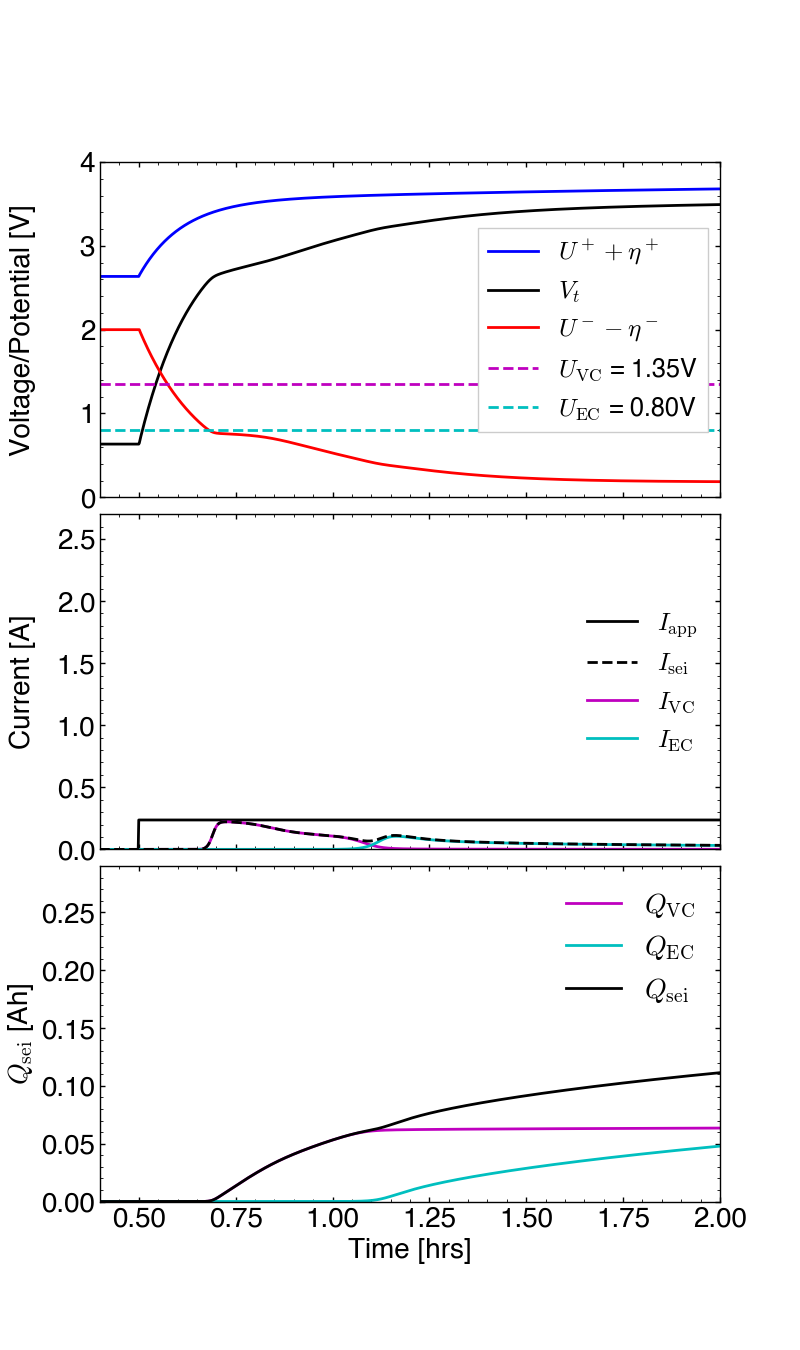

In [11]:
# %matplotlib widget
%autoreload
# sim1.plot(xlims=(0,5))
sim1.plot_view_1(xlims=(0.4, 2), ylim_current=(0, 2.7), to_annotate=False, ylim_thickness=(-5,100))


# Run the simulation: fast formation

In [4]:
%autoreload
Ichg = 2.37/10  # A
Idch = -2.37/10 # A
Icv = 2.37/20   # A

vmax = 4.2
vmin = 3.0

cell = cellsim.Cell()
cell.load_config('params/weng2021.yaml')
tag = cell.get_tag()

# sim = cellsim.Simulation(cell, 520*3600)
# sim2 = cellsim.Simulation(cell, 26*20*3600)
sim2 = cellsim.Simulation(cell, 2000*3600)

# Formation
sim2.run_rest(1, rest_time_hrs=0.5)
sim2.run_chg_cccv(2, 2.37, 2.37, 3.9)
sim2.run_chg_cccv(2, 2.37/5, 2.37/100, 4.2)
sim2.run_dch_cccv(2, -2.37/5, 2.37/5, 3.9)
sim2.run_chg_cccv(3, 2.37/5, 2.37/100, 4.2)
sim2.run_dch_cccv(3, -2.37/5, 2.37/5, 3.9)
sim2.run_chg_cccv(4, 2.37/5, 2.37/100, 4.2)
sim2.run_dch_cccv(4, -2.37/5, 2.37/5, 3.9)
sim2.run_chg_cccv(5, 2.37/5, 2.37/100, 4.2)
sim2.run_dch_cccv(5, -2.37/5, 2.37/5, 3.9)
sim2.run_chg_cccv(6, 2.37/5, 2.37/100, 4.2)
sim2.run_dch_cccv(6, -2.37/5, 2.37/5, 3.9)
sim2.run_dch_cccv(6, -2.37/1, 2.37/1, 3.0)

# RPT
sim2.run_chg_cccv(6, +2.37/10, +2.37/10, vmax)
sim2.run_dch_cccv(6, -2.37/10, 2.37/10, vmin)
sim2.run_chg_cccv(7, +2.37/10, +2.37/10, vmax)
sim2.run_rest(    7, rest_time_hrs=10.6)
sim2.run_dch_cccv(7, -2.37/10, 2.37/10, vmin)

# Cycling
num_cycles = 300
for i in np.arange(8, num_cycles):
    sim2.run_chg_cccv(i, 2.37/4, 2.37/4, vmax)
    sim2.run_dch_cccv(i, -2.37/4, -2.37/4, vmin)

df_sim2 = sim2.get_results()


Running Cyc1: Rest for 0.5 hours...
Running Cyc2: Charge to 3.9V...
Running Cyc2: Charge to 4.2V...
Running Cyc2: Discharge to 3.9V...
Running Cyc3: Charge to 4.2V...
Running Cyc3: Discharge to 3.9V...
Running Cyc4: Charge to 4.2V...
Running Cyc4: Discharge to 3.9V...
Running Cyc5: Charge to 4.2V...
Running Cyc5: Discharge to 3.9V...
Running Cyc6: Charge to 4.2V...
Running Cyc6: Discharge to 3.9V...
Running Cyc6: Discharge to 3.0V...
Running Cyc6: Charge to 4.2V...
Running Cyc6: Discharge to 3.0V...
Running Cyc7: Charge to 4.2V...
Running Cyc7: Rest for 10.6 hours...
Running Cyc7: Discharge to 3.0V...
Running Cyc8: Charge to 4.2V...
Running Cyc8: Discharge to 3.0V...
Running Cyc9: Charge to 4.2V...
Running Cyc9: Discharge to 3.0V...
Running Cyc10: Charge to 4.2V...
Running Cyc10: Discharge to 3.0V...
Running Cyc11: Charge to 4.2V...
Running Cyc11: Discharge to 3.0V...
Running Cyc12: Charge to 4.2V...
Running Cyc12: Discharge to 3.0V...
Running Cyc13: Charge to 4.2V...
Running Cyc13: Di

/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:336: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


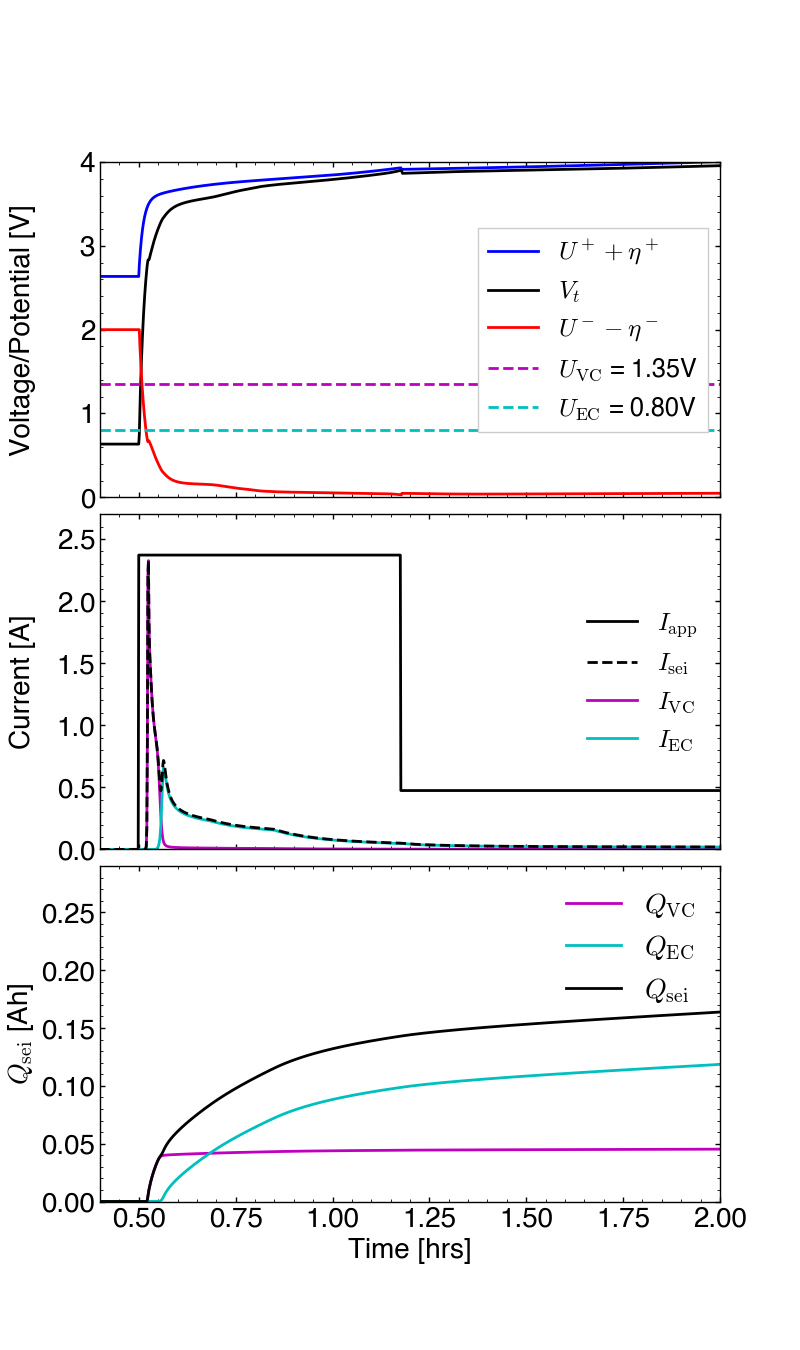

In [5]:
%matplotlib widget
%autoreload
# sim2.plot(xlims=(0,5))
# sim2.plot(xlims=(0.4,1))
sim2.plot_view_1(xlims=(0.4, 2), to_annotate=False, ylim_current=(0, 2.7), ylim_thickness=(-5,100))

/var/folders/qr/bx1pzh1x6nnbdrjvw2qhqkf40000gn/T/ipykernel_13439/1658967422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim1['D_sei1'].iloc[0] = np.NaN
/var/folders/qr/bx1pzh1x6nnbdrjvw2qhqkf40000gn/T/ipykernel_13439/1658967422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim2['D_sei1'].iloc[0] = np.NaN


Text(0, 0.5, '$\\bar{D}_\\mathrm{sei}$ [m$^2$/s]')

/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:336: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


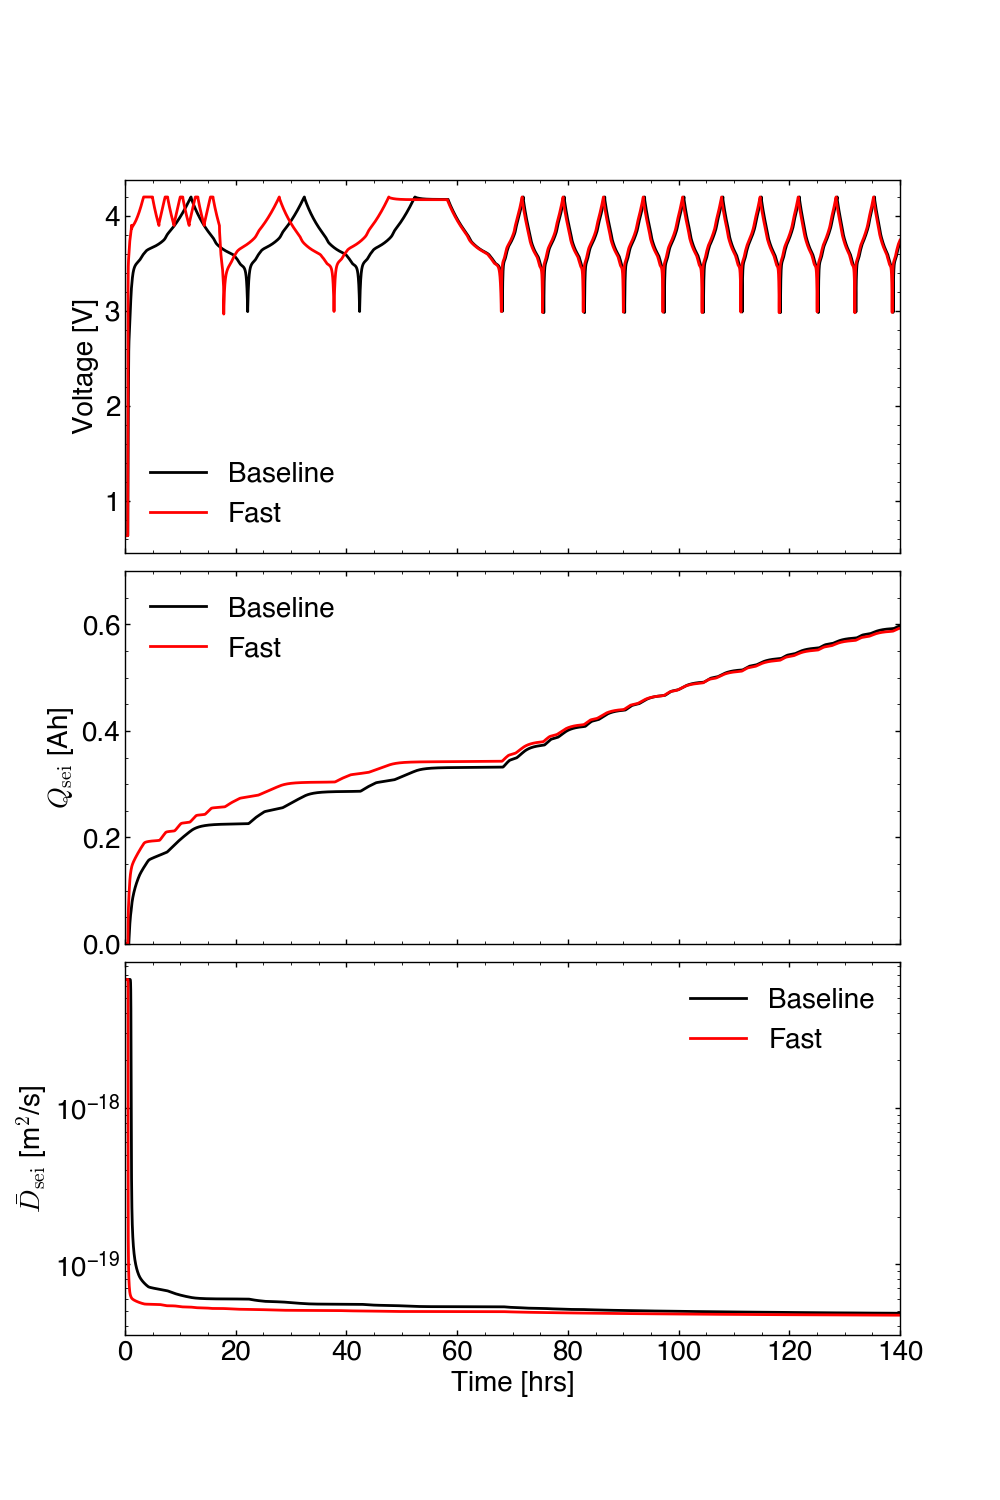

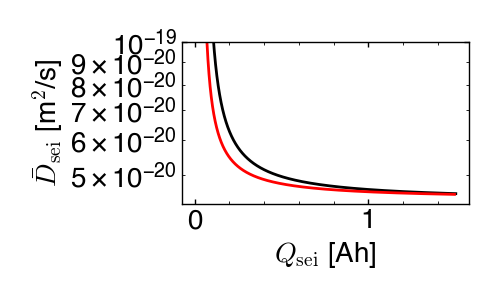

In [24]:
num_rows = 3
gridspec = dict(hspace=0.05, height_ratios=np.ones((num_rows, 1)))

df_sim1['D_sei1'].iloc[0] = np.NaN
df_sim2['D_sei1'].iloc[0] = np.NaN

fig, axs = plt.subplots(nrows=num_rows, ncols=1,
                        figsize=(10,num_rows*5),
                        gridspec_kw=gridspec,
                        sharex=True)

axs[0].grid(False)
axs[0].plot(df_sim1['t']/3600, df_sim1['vt'], label='Baseline', c='k')
axs[0].plot(df_sim2['t']/3600, df_sim2['vt'], label='Fast', c='r')
axs[0].set_ylabel('Voltage [V]')
axs[0].legend()

axs[1].grid(False)
axs[1].plot(df_sim1['t']/3600, df_sim1['q_sei'], label='Baseline', c='k')
axs[1].plot(df_sim2['t']/3600, df_sim2['q_sei'], label='Fast', c='r')
axs[1].set_ylabel(r'$Q_\mathrm{sei}$ [Ah]')
axs[1].set_ylim((0, 0.7))
axs[1].legend()

axs[2].grid(False)
axs[2].set_yscale('log')
axs[2].plot(df_sim1['t']/3600, df_sim1['D_sei1'], label='Baseline', c='k')
axs[2].plot(df_sim2['t']/3600, df_sim2['D_sei1'], label='Fast', c='r')
axs[2].set_ylabel(r'$\bar{D}_\mathrm{sei}$ [m$^2$/s]')
axs[2].legend()
# axs[2].set_ylim((3e-20, 1e-18))

# axs[3].grid(False)
# axs[3].plot(df_sim1['t']/3600, df_sim1['c_sei1'], label='Baseline, SEI1', c='k')
# axs[3].plot(df_sim2['t']/3600, df_sim2['c_sei1'], label='Fast, SEI1', c='r')

# axs2 = axs[3].twinx()
# axs2.plot(df_sim1['t']/3600, df_sim1['c_sei2'], ls='--', label='Baseline, SEI2', c='k')
# axs2.plot(df_sim2['t']/3600, df_sim2['c_sei2'], ls='--', label='Fast, SEI2', c='r')
# axs2.grid(False)
# axs2.legend()

# axs[3].set_ylabel('$c_\mathrm{SEI}$ [mol/m$^3$]')
# axs[3].legend()
axs[2].set_xlabel('Time [hrs]')

for ax in axs:
    ax.set_xlim((0, 140))

plt.figure(figsize=(5,3))
plt.yscale('log')
plt.grid(False)
plt.plot(df_sim1['q_sei'], df_sim1['D_sei1'], c='k', label='Baseline')
plt.plot(df_sim2['q_sei'], df_sim2['D_sei1'], c='r', label='Fast')
# plt.legend()
plt.ylim((4.3e-20, 1e-19))
# plt.ylim((3e-20, 1e-18))
plt.xlabel('$Q_\mathrm{sei}$ [Ah]')
plt.ylabel(r'$\bar{D}_\mathrm{sei}$ [m$^2$/s]')

In [7]:
df_sim1

,name,cell,dt,t,curr_k,i_app,cycle_number,step_number,theta_n,theta_p,...,delta_n,delta_p,dndt,boost,expansion_rev,expansion_irrev,dq,dqsei,dqsei1,dqsei2
0,DefaultSim,<src.cellsim.Cell object at 0x10336bfa0>,5.0,0.0,1068009,0.0000,1.0,4.0,0.000000e+00,1.000000,...,0.000000e+00,-0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,DefaultSim,<src.cellsim.Cell object at 0x10336bfa0>,5.0,5.0,1068009,0.0000,1.0,4.0,0.000000e+00,1.000000,...,0.000000e+00,-0.000000,0.000000e+00,0.000000,0.000000e+00,6.350000e-07,0.000000,4.812715e-25,1.551238e-31,4.812713e-25
2,DefaultSim,<src.cellsim.Cell object at 0x10336bfa0>,5.0,10.0,1068009,0.0000,1.0,4.0,-1.625917e-25,1.000000,...,-3.251834e-26,-0.000000,-6.503669e-27,0.000000,-1.463325e-29,6.350000e-07,0.000000,4.812715e-25,1.551238e-31,4.812713e-25
3,DefaultSim,<src.cellsim.Cell object at 0x10336bfa0>,5.0,15.0,1068009,0.0000,1.0,4.0,-3.251834e-25,1.000000,...,-6.503669e-26,-0.000000,-6.503669e-27,0.000000,-2.926651e-29,6.350000e-07,0.000000,4.812715e-25,1.551238e-31,4.812713e-25
4,DefaultSim,<src.cellsim.Cell object at 0x10336bfa0>,5.0,20.0,1068009,0.0000,1.0,4.0,-4.877751e-25,1.000000,...,-9.755503e-26,-0.000000,-6.503669e-27,0.000000,-4.389976e-29,6.350000e-07,0.000000,4.812715e-25,1.551238e-31,4.812713e-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068004,DefaultSim,<src.cellsim.Cell object at 0x10336bfa0>,5.0,5340020.0,1068009,-0.5925,299.0,2.0,1.604545e-02,0.456507,...,3.209090e-03,-0.005978,-1.112054e-05,20.964030,-1.246198e-06,4.049137e-04,0.000823,3.227986e-09,3.730952e-10,2.854890e-09
1068005,DefaultSim,<src.cellsim.Cell object at 0x10336bfa0>,5.0,5340025.0,1068009,-0.5925,299.0,2.0,1.576744e-02,0.456796,...,3.153487e-03,-0.005975,-1.112054e-05,20.946560,-1.269790e-06,4.049137e-04,0.000823,3.092549e-09,2.399374e-10,2.852612e-09
1068006,DefaultSim,<src.cellsim.Cell object at 0x10336bfa0>,5.0,5340030.0,1068009,-0.5925,299.0,2.0,1.548942e-02,0.457085,...,3.097885e-03,-0.005972,-1.112054e-05,20.929104,-1.293382e-06,4.049137e-04,0.000823,3.003097e-09,1.527666e-10,2.850330e-09
1068007,DefaultSim,<src.cellsim.Cell object at 0x10336bfa0>,5.0,5340035.0,1068009,-0.5925,299.0,2.0,1.521141e-02,0.457374,...,3.042282e-03,-0.005969,-1.112054e-05,20.911663,-1.316974e-06,4.049137e-04,0.000823,2.944338e-09,9.629504e-11,2.848043e-09


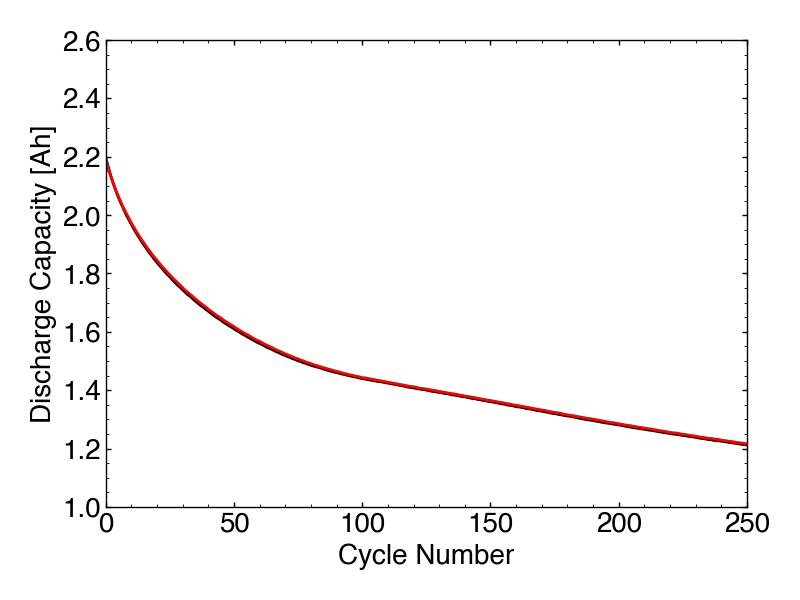

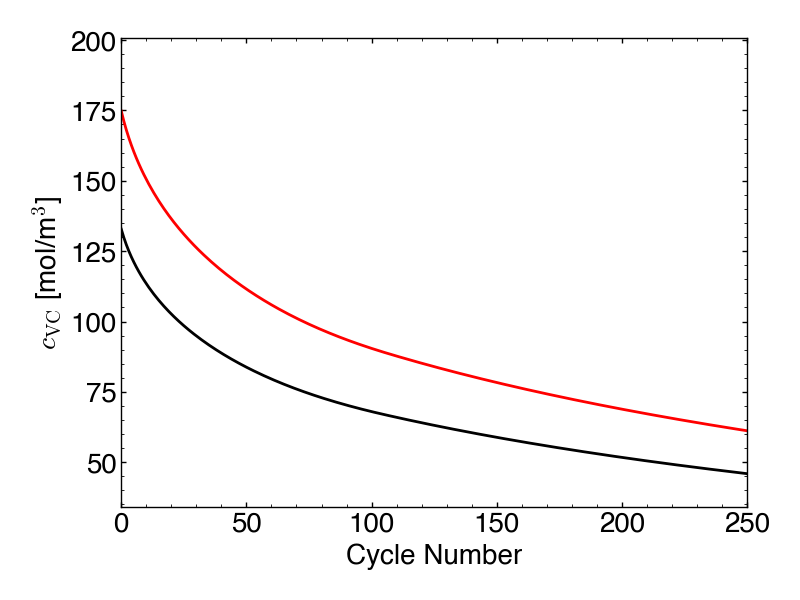

In [10]:
idx_first_cycle_count_base = 5
idx_first_cycle_count_fast = 8

# Aggregate results by cycle number, step number, then sum the dq
df1_group = df_sim1.groupby(['cycle_number', 'step_number']).agg({'dq': 'sum', 'c_sei2' : 'max'})
df2_group = df_sim2.groupby(['cycle_number', 'step_number']).agg({'dq': 'sum', 'c_sei2' : 'max'})

# Filter for step_number==2, the discharge steps
df1_group_filtered = df1_group.loc[df1_group.index.get_level_values('step_number') == 2]
df2_group_filtered = df2_group.loc[df2_group.index.get_level_values('step_number') == 2]


plt.figure(figsize=(8, 6))
plt.grid(False)
plt.plot(df1_group_filtered.index.get_level_values('cycle_number').values - idx_first_cycle_count_base,
         df1_group_filtered['dq'], c='k', label='Baseline')

plt.plot(df2_group_filtered.index.get_level_values('cycle_number').values - idx_first_cycle_count_fast,
         df2_group_filtered['dq'], c='r', label='Fast')

plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity [Ah]')
plt.xlim((0, 250))
plt.ylim((1.0, 2.6))
plt.show()
plt.legend()


plt.figure(figsize=(8, 6))
plt.grid(False)
plt.plot(df1_group_filtered.index.get_level_values('cycle_number').values - idx_first_cycle_count_base,
         df1_group_filtered['c_sei2'], c='k', label='Baseline')

plt.plot(df2_group_filtered.index.get_level_values('cycle_number').values - idx_first_cycle_count_fast,
         df2_group_filtered['c_sei2'], c='r', label='Fast')

plt.xlabel('Cycle Number')
plt.ylabel('$c_\mathrm{VC}$ [mol/m$^3$]')
plt.xlim((0, 250))
# plt.ylim((1.0, 2.6))
plt.show()
plt.legend()


